In [59]:
import pandas as pd  
import numpy as np  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import scipy.stats as stats
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Developed Countries 2020

Preprocessing

In [60]:
Developed_2020=pd.read_csv("Developed Countries 2020.csv")

In [61]:
Developed_2020

,ISO2,country_name,date,payment_apps_downloads_pop,payment_apps_wau_pop,mobiles_adults_w0,cp_ratio_txn_cnt,contactless_ratio_txn_cnt,cnp_ratio_txn_cnt
0,AU,Australia,30.12.19,411,4631,1.09252,0.72514,0.86608,0.24871
1,AU,Australia,6.1.20,355,4526,1.09252,0.74301,0.86812,0.23269
2,AU,Australia,13.1.20,359,4558,1.09252,0.74183,0.87034,0.23224
3,AU,Australia,20.1.20,364,4538,1.09252,0.74844,0.87233,0.22680
4,AU,Australia,27.1.20,360,4608,1.09252,0.74726,0.87562,0.22740
...,...,...,...,...,...,...,...,...,...
684,US,United States,30.11.20,827,16850,1.08093,0.55357,0.06948,0.41998
685,US,United States,7.12.20,906,17912,1.08093,0.58176,0.07023,0.39528
686,US,United States,14.12.20,960,16843,1.08093,0.58917,0.07105,0.38777
687,US,United States,21.12.20,1141,16764,1.08093,0.62005,0.07171,0.35509


In [62]:
Developed_2020.rename(columns = {'country name':'country_name'}, inplace = True)
Developed_2020.rename(columns = {'cp_ratio_txn_cnt':'Card_transaction'}, inplace = True)
Developed_2020.rename(columns = {'mobiles_adults_w0':'mobile_per_adault'}, inplace = True)
Developed_2020['apps_downloads']=Developed_2020['payment_apps_downloads_pop']/100000
Developed_2020['apps_usages']=Developed_2020['payment_apps_wau_pop']/100000
Developed_2020['NFC_transaction']=Developed_2020['contactless_ratio_txn_cnt']*Developed_2020['Card_transaction']
Developed_2020['Remote_Card_transaction']=Developed_2020['cnp_ratio_txn_cnt']*Developed_2020['Card_transaction']
Developed_2020=Developed_2020.drop(columns = ['ISO2','contactless_ratio_txn_cnt','cnp_ratio_txn_cnt','payment_apps_downloads_pop','payment_apps_wau_pop'])

In [63]:
Developed_2020

,country_name,date,mobile_per_adault,Card_transaction,apps_downloads,apps_usages,NFC_transaction,Remote_Card_transaction
0,Australia,30.12.19,1.09252,0.72514,0.00411,0.04631,0.628029,0.180350
1,Australia,6.1.20,1.09252,0.74301,0.00355,0.04526,0.645022,0.172891
2,Australia,13.1.20,1.09252,0.74183,0.00359,0.04558,0.645644,0.172283
3,Australia,20.1.20,1.09252,0.74844,0.00364,0.04538,0.652887,0.169746
4,Australia,27.1.20,1.09252,0.74726,0.00360,0.04608,0.654316,0.169927
...,...,...,...,...,...,...,...,...
684,United States,30.11.20,1.08093,0.55357,0.00827,0.16850,0.038462,0.232488
685,United States,7.12.20,1.08093,0.58176,0.00906,0.17912,0.040857,0.229958
686,United States,14.12.20,1.08093,0.58917,0.00960,0.16843,0.041861,0.228462
687,United States,21.12.20,1.08093,0.62005,0.01141,0.16764,0.044464,0.220174


In [64]:
uniqe_df = Developed_2020["date"].unique()
df_small_array = pd.DataFrame(data={'date': uniqe_df})
df_small_array.to_csv("./file.csv", sep=',',index=False)
df_small_array_index=df_small_array.reset_index()

In [65]:
df_Developed_2020 = pd.merge(df_small_array_index, 
                      Developed_2020, 
                      on = 'date', 
                      how = 'inner')

In [66]:
df_Developed_2020.rename(columns = {'index':'date_index'}, inplace = True)
df_Developed_2020=df_Developed_2020.drop(columns = ['date'])

In [67]:
df_Developed_2020

,date_index,country_name,mobile_per_adault,Card_transaction,apps_downloads,apps_usages,NFC_transaction,Remote_Card_transaction
0,0,Australia,1.09252,0.72514,0.00411,0.04631,0.628029,0.180350
1,0,Canada,0.91863,0.62055,0.00119,0.02025,0.366224,0.208821
2,0,Switzerland,1.26716,0.62243,0.00277,0.04260,0.309976,0.210979
3,0,Germany,1.28357,0.59989,0.00189,0.04338,0.273712,0.224335
4,0,Spain,1.18440,0.43524,0.00258,0.03154,0.311018,0.228201
...,...,...,...,...,...,...,...,...
684,52,Japan,1.47023,0.56349,0.00542,0.11282,0.007365,0.239934
685,52,Netherlands,1.27285,0.90286,0.00373,0.05296,0.732815,0.079334
686,52,Sweden,1.28491,0.79040,0.00439,0.20571,0.563160,0.121484
687,52,Singapore,1.55647,0.52971,0.01543,0.09766,0.477401,0.227219


In [68]:
df_Developed_2020[['date_index']] = df_Developed_2020[['date_index']].astype("object")

In [69]:
df_Developed_2020[['Card_transaction','NFC_transaction','apps_downloads','apps_usages','Remote_Card_transaction','mobile_per_adault']].corr().round(2)

,Card_transaction,NFC_transaction,apps_downloads,apps_usages,Remote_Card_transaction,mobile_per_adault
Card_transaction,1.00,0.63,-0.23,0.18,-0.77,-0.31
NFC_transaction,0.63,1.00,-0.29,-0.25,-0.67,-0.13
apps_downloads,-0.23,-0.29,1.00,0.55,0.18,0.63
apps_usages,0.18,-0.25,0.55,1.00,-0.17,0.36
Remote_Card_transaction,-0.77,-0.67,0.18,-0.17,1.00,0.15
mobile_per_adault,-0.31,-0.13,0.63,0.36,0.15,1.00


Model

In [70]:
model_Developed_2020 = ols(formula='Card_transaction~NFC_transaction', data=df_Developed_2020).fit()
print(model_Developed_2020.summary())

                            OLS Regression Results                            
Dep. Variable:       Card_transaction   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     442.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           3.08e-76
Time:                        18:33:33   Log-Likelihood:                 454.43
No. Observations:                 689   AIC:                            -904.9
Df Residuals:                     687   BIC:                            -895.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4174      0.010     

Text(0, 0.5, 'Card Transaction')

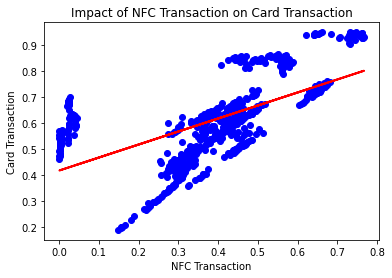

In [71]:
Card_transaction_hat = model_Developed_2020.params.Intercept+model_Developed_2020.params.NFC_transaction*df_Developed_2020['NFC_transaction']
plt.scatter(df_Developed_2020.NFC_transaction, df_Developed_2020.Card_transaction,  color='blue')
plt.plot(df_Developed_2020.NFC_transaction, Card_transaction_hat, color='red', linewidth=2)
plt.title('Impact of NFC Transaction on Card Transaction')
plt.xlabel('NFC Transaction')
plt.ylabel('Card Transaction')

In [72]:
model_Developed_2020_output = ols(formula='Card_transaction~NFC_transaction+Remote_Card_transaction+apps_usages+country_name+date_index', data=df_Developed_2020).fit()
print(model_Developed_2020_output.summary())

                            OLS Regression Results                            
Dep. Variable:       Card_transaction   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     498.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:33:33   Log-Likelihood:                 1662.2
No. Observations:                 689   AIC:                            -3188.
Df Residuals:                     621   BIC:                            -2880.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# Developing Countries 2020

Preprocessing

In [73]:
Developing_2020=pd.read_csv("Developing Countries 2020.csv")

In [74]:
Developing_2020

,ISO2,country_name,date,payment_apps_downloads_pop,payment_apps_wau_pop,mobiles_adults_w0,cp_ratio_txn_cnt,contactless_ratio_txn_cnt,cnp_ratio_txn_cnt
0,AR,Argentina,30.12.19,440,4779,1.25842,0.81016,0.01336,0.15179
1,AR,Argentina,6.1.20,362,4552,1.25842,0.80245,0.01526,0.16290
2,AR,Argentina,13.1.20,383,4678,1.25842,0.77264,0.01697,0.15485
3,AR,Argentina,20.1.20,405,4647,1.25842,0.77627,0.01807,0.15423
4,AR,Argentina,27.1.20,430,4927,1.25842,0.79614,0.02254,0.16028
...,...,...,...,...,...,...,...,...,...
260,ZA,South Africa,30.11.20,76,602,1.65600,0.85195,0.21849,0.14524
261,ZA,South Africa,7.12.20,66,600,1.65600,0.86762,0.25647,0.13028
262,ZA,South Africa,14.12.20,68,592,1.65600,0.86922,0.25399,0.12906
263,ZA,South Africa,21.12.20,66,584,1.65600,0.88009,0.24668,0.11805


In [75]:
Developing_2020.rename(columns = {'country name':'country_name'}, inplace = True)
Developing_2020.rename(columns = {'cp_ratio_txn_cnt':'Card_transaction'}, inplace = True)
Developing_2020.rename(columns = {'mobiles_adults_w0':'mobile_per_adault'}, inplace = True)
Developing_2020['apps_downloads']=Developing_2020['payment_apps_downloads_pop']/100000
Developing_2020['apps_usages']=Developing_2020['payment_apps_wau_pop']/100000
Developing_2020['NFC_transaction']=Developing_2020['contactless_ratio_txn_cnt']*Developing_2020['Card_transaction']
Developing_2020['Remote_Card_transaction']=Developing_2020['cnp_ratio_txn_cnt']*Developing_2020['Card_transaction']
Developing_2020=Developing_2020.drop(columns = ['ISO2','contactless_ratio_txn_cnt','cnp_ratio_txn_cnt','payment_apps_downloads_pop','payment_apps_wau_pop'])

In [76]:
Developing_2020

,country_name,date,mobile_per_adault,Card_transaction,apps_downloads,apps_usages,NFC_transaction,Remote_Card_transaction
0,Argentina,30.12.19,1.25842,0.81016,0.00440,0.04779,0.010824,0.122974
1,Argentina,6.1.20,1.25842,0.80245,0.00362,0.04552,0.012245,0.130719
2,Argentina,13.1.20,1.25842,0.77264,0.00383,0.04678,0.013112,0.119643
3,Argentina,20.1.20,1.25842,0.77627,0.00405,0.04647,0.014027,0.119724
4,Argentina,27.1.20,1.25842,0.79614,0.00430,0.04927,0.017945,0.127605
...,...,...,...,...,...,...,...,...
260,South Africa,30.11.20,1.65600,0.85195,0.00076,0.00602,0.186143,0.123737
261,South Africa,7.12.20,1.65600,0.86762,0.00066,0.00600,0.222519,0.113034
262,South Africa,14.12.20,1.65600,0.86922,0.00068,0.00592,0.220773,0.112182
263,South Africa,21.12.20,1.65600,0.88009,0.00066,0.00584,0.217101,0.103895


In [77]:
uniqe_df_2 = Developing_2020["date"].unique()
df_small_array_2 = pd.DataFrame(data={'date': uniqe_df_2})
df_small_array_2.to_csv("./file.csv", sep=',',index=False)
df_small_array_2_index=df_small_array_2.reset_index()

In [78]:
df_Developing_2020 = pd.merge(df_small_array_2_index, 
                      Developing_2020, 
                      on = 'date', 
                      how = 'inner')

In [79]:
df_Developing_2020.rename(columns = {'index':'date_index'}, inplace = True)
df_Developing_2020=df_Developing_2020.drop(columns = ['date'])

In [80]:
df_Developing_2020

,date_index,country_name,mobile_per_adault,Card_transaction,apps_downloads,apps_usages,NFC_transaction,Remote_Card_transaction
0,0,Argentina,1.25842,0.81016,0.00440,0.04779,0.010824,0.122974
1,0,Brazil,0.95716,0.83211,0.00357,0.04680,0.011766,0.119574
2,0,India,0.84270,0.41925,0.00478,0.14835,0.059223,0.242335
3,0,Russia,1.64388,0.84347,0.00370,0.03566,0.738787,0.127162
4,0,South Africa,1.65600,0.89511,0.00021,0.00251,0.079898,0.090881
...,...,...,...,...,...,...,...,...
260,52,Argentina,1.25842,0.58864,0.00367,0.07034,0.052895,0.212528
261,52,Brazil,0.95716,0.81246,0.00807,0.08612,0.051957,0.138638
262,52,India,0.84270,0.31238,0.00465,0.13502,0.072585,0.213640
263,52,Russia,1.64388,0.82765,0.00288,0.04012,0.800950,0.134948


In [81]:
df_Developing_2020[['date_index']] = df_Developing_2020[['date_index']].astype("object")

In [82]:
df_Developing_2020[['Card_transaction','NFC_transaction']].corr().round(2)

,Card_transaction,NFC_transaction
Card_transaction,1.00,0.42
NFC_transaction,0.42,1.00


Model

In [83]:
model_Developing_2020 = ols(formula='Card_transaction~NFC_transaction', data=df_Developing_2020).fit()
print(model_Developing_2020.summary())

                            OLS Regression Results                            
Dep. Variable:       Card_transaction   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     56.08
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.06e-12
Time:                        18:33:36   Log-Likelihood:                 51.655
No. Observations:                 265   AIC:                            -99.31
Df Residuals:                     263   BIC:                            -92.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6136      0.015     

Text(0, 0.5, 'Card Transaction')

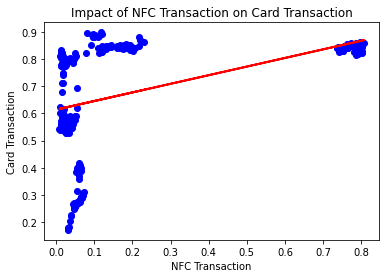

In [84]:
Card_transaction_hat = model_Developing_2020.params.Intercept+model_Developing_2020.params.NFC_transaction*df_Developing_2020['NFC_transaction']
plt.scatter(df_Developing_2020.NFC_transaction, df_Developing_2020.Card_transaction,  color='blue')
plt.plot(df_Developing_2020.NFC_transaction, Card_transaction_hat, color='red', linewidth=2)
plt.title('Impact of NFC Transaction on Card Transaction')
plt.xlabel('NFC Transaction')
plt.ylabel('Card Transaction')

In [85]:
model_Developing_2020_output = ols(formula='Card_transaction~NFC_transaction+Remote_Card_transaction+apps_usages+country_name+date_index', data=df_Developing_2020).fit()
print(model_Developing_2020_output.summary())

                            OLS Regression Results                            
Dep. Variable:       Card_transaction   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     167.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.34e-145
Time:                        18:33:36   Log-Likelihood:                 542.01
No. Observations:                 265   AIC:                            -964.0
Df Residuals:                     205   BIC:                            -749.2
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       